__Group Member Names:__ Zach Barrett, Ashton Hansen


---

# Homework 5
__Guideline:__ 
* Please write the names of all group members to the __"Group Member Names:"__ line above. 
* For the questions that require verbal answers, please answer them in their respective answer cells. 
* For the questions that require code, if your code doesn't work, please include a comment describing your algorithm (if code works well, no explanation is needed). 
* Questions 1 and 4 are each worth 2 points. Questions 2 and 3 are each worth 3 points.
* This homework is due on __Apr. 28, 2021, 5:30 pm.__ You need to upload your completed homework assignment to Sakai as a Jupyter Notebook file (.ipynb) until that time.
---

In [1]:
import numpy as np   
import numpy_financial as npf   # numpy-financial. If you don't have it installed, run >>> pip install numpy-financial
import pandas as pd
import datetime as dt  
import pandas_datareader.data as web    
import matplotlib as mpl                
import matplotlib.pyplot as plt
import math
import numpy.random as npr  
from scipy import stats   
from statsmodels import regression      
import statsmodels.api as sm

---

## Question 1:
Consider the bond with the following features that pays annual coupons:
* __Face value__ : 100
* __Coupon rate__ : 0.08
* __Coupon frequency__: 1
* __Time to maturity__: 20

Suppose that the interest rate (YTM) equals 7%. 

a) Write a function that calculates the bond's price. What is the bond's current price?

In [2]:
def bondPriceCalculator(coupon_rate, interest_rate, frequency_of_payments, years_to_maturity, face_value):
    coupon_payment = coupon_rate * face_value
    coupon_leg = coupon_payment / interest_rate * (1 - (1 + interest_rate / frequency_of_payments) ** (-1 * frequency_of_payments * years_to_maturity))
    face_leg = face_value / ((1 + interest_rate / frequency_of_payments) ** (frequency_of_payments * years_to_maturity))
    bond_price = coupon_leg + face_leg
    return bond_price


In [3]:
print('The aforementioned bond\'s price is : ', bondPriceCalculator(.08, .07, 1, 20, 100))

The aforementioned bond's price is :  110.59401424551616


b) Construct a dataframe that shows the bond price for all the scenarios where interest rate (YTM) varies between 7% to 9%, by 0.1% increments (0.070, 0.071, ..., 0.088, 0.089, 0.090). Basically, your table will have 21 rows, with 4 columns for bond characteristics, 1 column for interest rate (YTM), and 1 column for the bond prices. The only varying columns will be interest rate (YTM) and corresponding bond price. 

In [4]:
# getting YTMs
ytm_arr = np.linspace(.07, .09, num=21)

# building df
part_a_df = pd.DataFrame()

part_a_df['years_to_maturity'] = ytm_arr
part_a_df['coupon_rate'] = .08
part_a_df['interest_rate'] = .07
part_a_df['face_value'] = 100
part_a_df['frequency_of_payments'] = 1
part_a_df['bond_price'] = bondPriceCalculator(part_a_df['coupon_rate'], part_a_df['interest_rate'], part_a_df['frequency_of_payments'],
                                              part_a_df['years_to_maturity'], part_a_df['face_value'])

part_a_df

,years_to_maturity,coupon_rate,interest_rate,face_value,frequency_of_payments,bond_price
0,0.070,0.08,0.07,100,1,100.067499
1,0.071,0.08,0.07,100,1,100.068461
2,0.072,0.08,0.07,100,1,100.069423
3,0.073,0.08,0.07,100,1,100.070384
4,0.074,0.08,0.07,100,1,100.071346
5,0.075,0.08,0.07,100,1,100.072308
6,0.076,0.08,0.07,100,1,100.073269
7,0.077,0.08,0.07,100,1,100.074231
8,0.078,0.08,0.07,100,1,100.075192
9,0.079,0.08,0.07,100,1,100.076154


---

## Question 2:
Consider a mortgage loan with the following characteristics:
* __Total principal amount__: 400,000
* __Interest rate__ : 5%
* __Years to maturity__: 15 years
* __Frequency__: 12 (monthly payments)

a) Write a function that prepares the amortization schedule for this loan. (let's call this offer a).

In [3]:
def amortizationSchedule(total_principal, interest_rate, maturity, frequency):
    schedule = np.arange(1, maturity * frequency + 1, 1)

    df = pd.DataFrame(index = schedule, columns = ['Payment', 'Principal payment', 'Interest payment'])
    df.index.name = 'Period'
    
    df['Payment'] = npf.pmt(interest_rate / frequency, maturity * frequency, total_principal)
    df['Principal payment'] = npf.ppmt(interest_rate / frequency, df.index, maturity * frequency, total_principal)
    df['Interest payment'] = npf.ipmt(interest_rate / frequency, df.index, maturity * frequency, total_principal)
    
    return df

In [4]:
offer_a = amortizationSchedule(400000, .05, 15, 12)
offer_a

,Payment,Principal payment,Interest payment
Period,,,
1,-3163.174507,-1496.507840,-1666.666667
2,-3163.174507,-1502.743290,-1660.431217
3,-3163.174507,-1509.004720,-1654.169787
4,-3163.174507,-1515.292240,-1647.882267
5,-3163.174507,-1521.605957,-1641.568550
...,...,...,...
176,-3163.174507,-3098.090839,-65.083668
177,-3163.174507,-3110.999551,-52.174956
178,-3163.174507,-3123.962049,-39.212458


b) For the same principal amount, the customer is provided with a competing offer (let's call this offer b) as follows:
* __Total principal amount__: 400,000
* __Interest rate__ : 7%
* __Years to maturity__: 10 years
* __Frequency__: 12 (monthly payments)

Under which offer the customer pays more total interest? Offer in a) or b)?

In [5]:
offer_b = amortizationSchedule(400000, .07, 10, 12)
offer_b

,Payment,Principal payment,Interest payment
Period,,,
1,-4644.339169,-2311.005835,-2333.333333
2,-4644.339169,-2324.486703,-2319.852466
3,-4644.339169,-2338.046209,-2306.292960
4,-4644.339169,-2351.684811,-2292.654357
5,-4644.339169,-2365.402973,-2278.936196
...,...,...,...
116,-4644.339169,-4511.217931,-133.121238
117,-4644.339169,-4537.533369,-106.805800
118,-4644.339169,-4564.002314,-80.336855


In [6]:
print('Total interest paid in offer A: ', -sum(offer_a['Interest payment']))
print('Total interest paid in offer B: ', -sum(offer_b['Interest payment']))

Total interest paid in offer A:  169371.41125391188
Total interest paid in offer B:  157320.70024939548


## The customer pays more total interest in offer A

---

## __Question 3:__  
Suppose there is stock that is currently trading at 200 dollars per share. A year later, we expect that the stock's price can fall anywhere between 100 to 300 dollars per share. We also have the following European options trading on the stock, each with one year left to expiry:
* Five call options, with strike prices and premiums in parentheses: 120 (50), 160 (40), 200 (30), 240 (20), and 280 (10).
* Five put options, with strike prices and premiums in parentheses: 120 (10), 160 (20), 200 (30), 240 (40), and 280 (50).

The following questions ask the construction of a strategy from the below table. There can be multiple ways to construct a given strategy. Any answer that correctly resembles the asked strategy is accepted.

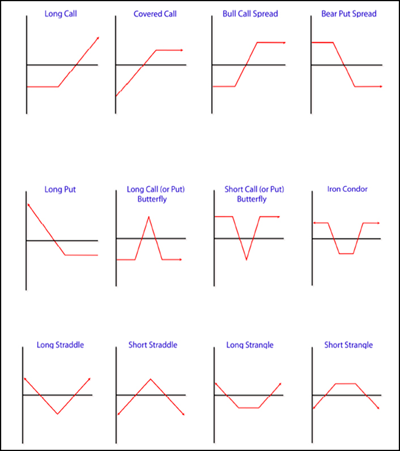

a) Construct an options strategy that replicates the profits and losses (P\&L) of Bull Call Spread strategy. Plot the P\&L diagram.

In [7]:
def call_pl(stock_range, strike_price, premium = 0):
    return np.maximum(stock_range - strike_price, 0) - premium

def put_pl(stock_range, strike_price, premium = 0):
    return np.maximum(strike_price - stock_range, 0) - premium

In [8]:
# creating array with values ranging from 100-300
stock_range_arr = np.linspace(100, 300, num=201)

In [10]:
# combining options to create bull call spread
portfolio_pl = call_pl(stock_range_arr, 160, 40) - call_pl(stock_range_arr, 240, 20)

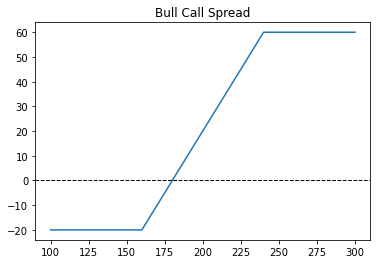

In [11]:
# visualizing the bull call spread
plt.plot(stock_range_arr, portfolio_pl)
plt.title('Bull Call Spread')
plt.axhline(y=0, color = 'k', linestyle='--', lw = 1);

b) Construct an options strategy that replicates the profits and losses (P\&L) of Iron Condor strategy. Plot the P\&L diagram.

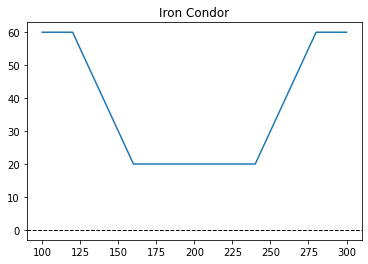

In [98]:
# combining options to create bull call spread
portfolio_pl = call_pl(stock_range_arr, 160, 40) + put_pl(stock_range_arr, 240, 40) - call_pl(stock_range_arr, 280, 10) - put_pl(stock_range_arr, 120, 10)

# visualizing the bull call spread
plt.plot(stock_range_arr, portfolio_pl)
plt.title('Iron Condor')
plt.axhline(y=0, color = 'k', linestyle='--', lw = 1);

---

## Question 4:
a) Define a function that calculates the expected present value of payoffs for European put options. You may refer to the BSM model we used in lecture notes to define this function. (i.e., BSM price of the option)

In [20]:
def bsm_option_price(S0, K, T, r, sigma, option = 'call'):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = (np.log(S0 / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    if option == 'call':
        value = (S0 * stats.norm.cdf(d1, 0.0, 1.0)) - K * np.exp(-r * T) * stats.norm.cdf(d2, 0.0, 1.0)
    else: 
        value =  K * np.exp(-r * T) * stats.norm.cdf(-1*d2, 0.0, 1.0) - (S0 * stats.norm.cdf(-1*d1, 0.0, 1.0))
    return value

b) Now, suppose we have a stock that can take prices between 0 and 200 dollars until the end of next year. Assume that the stock also has a standard deviation of returns of 30%, and that risk-free rate is 1%.
The stock also has a European put option trading on it, that has a strike price of $100 and maturity of 1 year.

Plot the payoff diagram of the option today, and on the expiration date. (i.e., option value today vs. at expiry)

<font color='gray'>(Note: The put option's today expected payoff may be very similar to or slightly lower than its expiration date payoff at some low stock price levels. This is ok.)</font>

In [24]:
stock_price_range = np.linspace(0, 200, 201)

C:\space_errors\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\space_errors\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


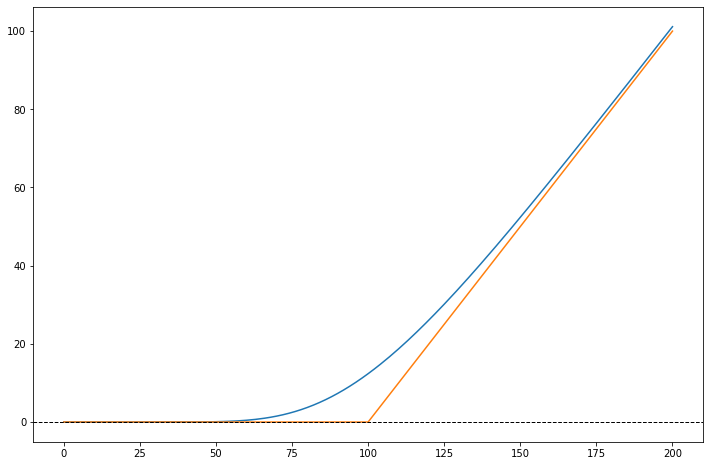

In [31]:
bsm_prices = bsm_option_price(S0=stock_price_range, K=100, T=1, r=.01, sigma=.3)
portfolio_pl = call_pl(stock_price_range, 100)

plt.figure(figsize = (12, 8))
plt.plot(stock_price_range, bsm_prices, portfolio_pl)
plt.axhline(y=0, color = 'k', linestyle='--', lw = 1);

---